In [7]:
import pandas as pd
df = pd.read_csv('drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [2]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [3]:
# 대륙 간 국가 갯수 / 대륙간 국가가 몇개 있는 지 출력
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [10]:
# AF에 속하는 국가의 맥주소비량을 출력하시오
df[df['continent']=='AF']['beer_servings'].head()

2      25
4     217
18     34
22    173
26     25
Name: beer_servings, dtype: int64

In [5]:
# 대륙간 맥주 소비량 출력하시오
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [15]:
df['continent']

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [18]:
# 대륙별 평균 wine_serving출력

df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [6]:
df.head()

NameError: name 'df' is not defined

In [5]:
# 상관관계 함수
corr = df[['beer_servings','wine_servings']].corr(method='pearson')
corr

NameError: name 'df' is not defined

In [4]:
# 4개 모두 다 상관관계 행렬구현
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

NameError: name 'df' is not defined

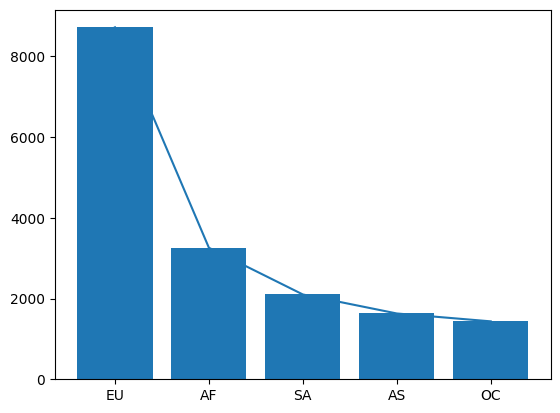

In [9]:
# 대륙별로 맥주소비량, 와인소비량 평균 최소 최대 합계
df.groupby('continent')['wine_servings'].agg(['mean','max','min','sum'])
df.groupby('continent')['beer_servings'].agg(['mean','max','min','sum'])
# 맥주소비량이 가장 높은 대륙은 어떻게 되는 지 출력
x=df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y=df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values
# 막대그래프 대륙별 맥주소비량 그래프로 구현
import matplotlib.pyplot as plt
plt.bar(x,y)
plt.plot(x,y)


In [18]:
# AF와 EU 맥주소비량 차이

beer_eu = df[df['continent'] == 'EU']['beer_servings'].sum()
beer_af = df[df['continent'] == 'AF']['beer_servings'].sum()
beer_eu - beer_af

5462

In [23]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,0
2,Algeria,25,0,14,0.7,AF,0
3,Andorra,245,138,312,12.4,EU,0
4,Angola,217,57,45,5.9,AF,0
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,0
189,Vietnam,111,2,1,2.0,AS,0
190,Yemen,6,0,0,0.1,AS,0
191,Zambia,32,19,4,2.5,AF,0


In [26]:
# 컬럼의 모든 술의 총량을 출력
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']

In [37]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [28]:
# 술소비량 대비 알콜 비율 어느정도 양이 되는 지 출력
df['total_litres_of_pure_alcohol']/df['total_servings']

0           NaN
1      0.017818
2      0.017949
3      0.017842
4      0.018495
         ...   
188    0.017661
189    0.017544
190    0.016667
191    0.045455
192    0.054651
Length: 193, dtype: float64

In [41]:
# 나라별 역순 정렬
# alcohol_rate 컬럼을 추가해서 정렬하시오
df['alcohol_rate']=(df['total_litres_of_pure_alcohol']/df['total_servings'])
df.sort_values('alcohol_rate',ascending=False).head(20)[['country','alcohol_rate']]

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


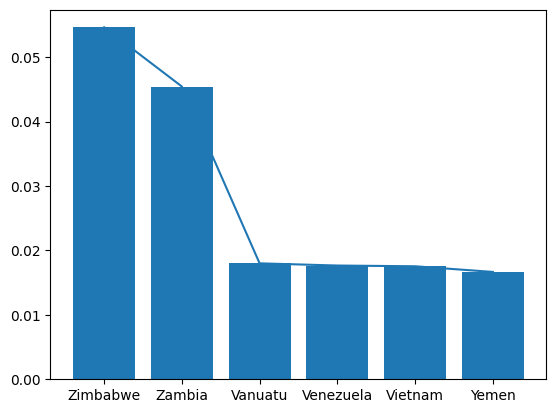

In [46]:
x= df.groupby('country')['alcohol_rate'].sum().sort_values(ascending=False).index
y= df.groupby('country')['alcohol_rate'].sum().sort_values(ascending=False).values
import matplotlib.pyplot as plt
plt.bar(x,y)
plt.plot(x,y)

In [51]:
df_country =i_list = [i+1 for i in range(df_country)]


NameError: name 'df_country' is not defined